In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("2020-XTern-DS.csv")
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


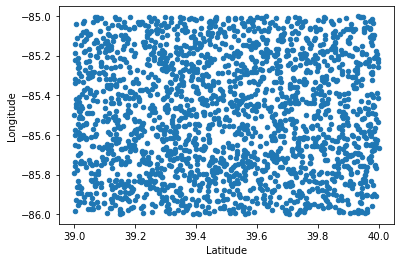

In [4]:
%matplotlib inline
df.plot.scatter(x="Latitude", y="Longitude")

In [7]:
df [:2]


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes


In [31]:
mean = df.mean()


print("Mean Latitude = " + str(mean.Latitude))

print("Mean Longitude = "  +str(mean.Longitude))


Latitude = 39.499131463858205
longitude = -85.50349404920757


In [33]:
df[(df.Latitude >mean.Latitude-.1) & (df.Latitude <mean.Latitude+.1) & (df.Longitude >mean.Longitude-.1)&(df.Longitude < -85.4)]

#has 94 rows

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
68,ID_2216,39.592641,-85.515346,"Chinese, Thai",$15.00,$50.00,3.2,9,1,30 minutes
97,ID_6224,39.426864,-85.489084,Chinese,$10.00,$50.00,3.5,24,1,30 minutes
157,ID_7299,39.513160,-85.438150,"Bakery, Desserts",$15.00,$50.00,3.8,72,33,45 minutes
180,ID_7261,39.593196,-85.587133,"North Indian, South Indian, Chinese, Fast Food",$35.00,$50.00,3.0,19,5,45 minutes
241,ID_437,39.451464,-85.545637,"North Indian, Fast Food",$10.00,$50.00,3.3,10,-,30 minutes
...,...,...,...,...,...,...,...,...,...,...
1841,ID_6470,39.412880,-85.419678,"Fast Food, Sandwich",$15.00,$50.00,3.4,14,3,30 minutes
1891,ID_3721,39.560495,-85.412468,"Biryani, North Indian",$20.00,$99.00,2.7,30,2,65 minutes
1899,ID_8233,39.488832,-85.401235,Fast Food,$10.00,$50.00,3.6,90,31,30 minutes
1912,ID_6163,39.580617,-85.402252,Fast Food,$20.00,$50.00,2.9,57,24,30 minutes


In [34]:
inRadius = df[(df.Latitude >mean.Latitude-.1) & (df.Latitude <mean.Latitude+.1) & (df.Longitude >mean.Longitude-.1)&(df.Longitude < mean.Longitude+.1)]

These are the restaurants that sell Italian cuisine in the radius.


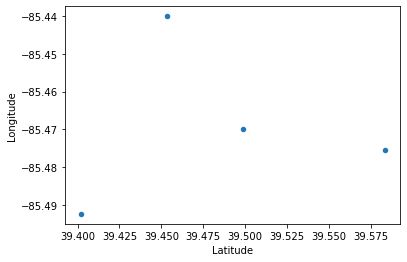

In [266]:
Cuisines = inRadius['Cuisines'].to_numpy()
Italian_inRadius = inRadius[(inRadius['Cuisines'].str.contains('Italian') == True)]
Italian_inRadius

%matplotlib inline
Italian_inRadius.plot.scatter(x="Latitude", y="Longitude")
print("These are the restaurants that sell Italian cuisine in the radius.")

In [258]:
maxRate = Italian_inRadius["Rating"].max()
BestItalian = Italian_inRadius[(Italian_inRadius.Rating == maxRate)]
BestItalian

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
391,ID_1432,39.453625,-85.440074,"Cafe, Chinese, Italian",$30.00,$99.00,4.1,803,554,45 minutes


In [123]:
cheepOrderArr = inRadius['Minimum_Order'].to_numpy()
cheepOrderArr
inRadius

inRadius[(inRadius.Minimum_Order == "$0.00")]

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
1797,ID_2693,39.438001,-85.598725,"North Indian, Chinese, Mughlai, Momos",$20.00,$0.00,3.8,551,173,65 minutes


These are the scatter points of latitude and longitude for the cheep food restaurants in the radius.


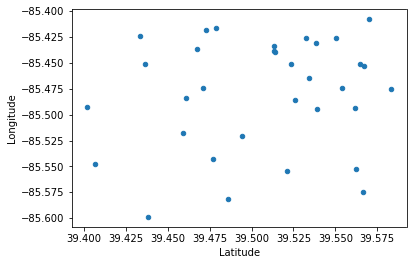

In [264]:
cheepFoodIR = inRadius[((inRadius.Minimum_Order) < '$55') & (inRadius.Rating > '3.5') & (inRadius.Average_Cost <'$25')]
cheepFoodIR

%matplotlib inline
cheepFoodIR.plot.scatter(x="Latitude", y="Longitude")
print("These are the scatter points of latitude and longitude for the cheep food restaurants in the radius.")



In [139]:
cheapFood = df[((df.Minimum_Order) < '$55') & (df.Rating > '3.5') & (df.Average_Cost <'$25')]
cheapFood[cheapFood.Minimum_Order < '$50']

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
298,ID_2301,39.214097,-85.744661,"Pizza, Fast Food",$20.00,$0.00,3.6,277,89,30 minutes
473,ID_8450,39.014059,-85.585383,"Cafe, Desserts, Fast Food, Beverages",$20.00,$0.00,4.3,102,76,30 minutes
632,ID_2301,39.632994,-85.119113,"Pizza, Fast Food",$20.00,$0.00,3.7,684,97,30 minutes
967,ID_2301,39.368220,-85.197694,"Pizza, Fast Food",$20.00,$0.00,3.7,112,18,30 minutes
1681,ID_7184,39.143594,-85.637799,"Wraps, Healthy Food, Sandwich, Salad",$15.00,$0.00,3.8,428,133,65 minutes
1797,ID_2693,39.438001,-85.598725,"North Indian, Chinese, Mughlai, Momos",$20.00,$0.00,3.8,551,173,65 minutes
1998,ID_4506,39.462084,-85.152022,"South Indian, Chinese",$10.00,$0.00,NEW,-,-,30 minutes


In [233]:
PriceIN = inRadius['Average_Cost'].to_numpy()
n = len(avePriceIN)
      
import numpy as np
newArr=np.empty([n,1])

for i in range(0,n):
    print(PriceIN[i])
    a,b = PriceIN[i].split('$')
    #print(b)
    #b,a=b.split('.')
    print(b)
    newArr[i] =b
    
avePriceIn = newArr.mean()
print("The average price in the radius is: $" + str(avePriceIn))

    
    
        


$15.00
15.00
$10.00
10.00
$15.00
15.00
$35.00
35.00
$10.00
10.00
$30.00
30.00
$20.00
20.00
$20.00
20.00
$20.00
20.00
$10.00
10.00
$20.00
20.00
$30.00
30.00
$15.00
15.00
$20.00
20.00
$35.00
35.00
$5.00
5.00
$15.00
15.00
$10.00
10.00
$20.00
20.00
$20.00
20.00
$15.00
15.00
$20.00
20.00
$20.00
20.00
$40.00
40.00
$10.00
10.00
$10.00
10.00
$20.00
20.00
$25.00
25.00
$10.00
10.00
$15.00
15.00
$10.00
10.00
$10.00
10.00
$15.00
15.00
$20.00
20.00
$40.00
40.00
$10.00
10.00
$20.00
20.00
$10.00
10.00
$15.00
15.00
$25.00
25.00
$20.00
20.00
$10.00
10.00
$10.00
10.00
$15.00
15.00
$10.00
10.00
$20.00
20.00
$25.00
25.00
$10.00
10.00
$15.00
15.00
$15.00
15.00
$20.00
20.00
$10.00
10.00
$20.00
20.00
$35.00
35.00
$15.00
15.00
$80.00
80.00
$20.00
20.00
$15.00
15.00
$20.00
20.00
$20.00
20.00
$20.00
20.00
$10.00
10.00
$15.00
15.00
$5.00
5.00
$15.00
15.00
$25.00
25.00
$10.00
10.00
$10.00
10.00
$20.00
20.00
$80.00
80.00
$30.00
30.00
$20.00
20.00
$15.00
15.00
$10.00
10.00
$15.00
15.00
$10.00
10.00
$20.00
20.00
$20

These are the scatter points of longitude and latitude of all the restaurants in the mean radius.
 The red dot is the best Italian restaurant.


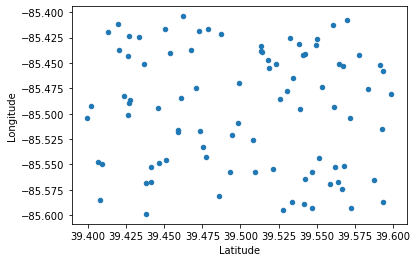

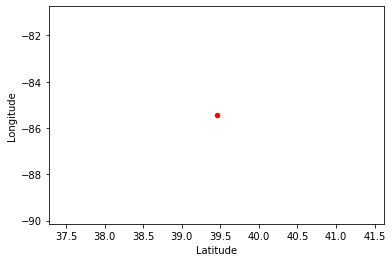

In [262]:
%matplotlib inline
inRadius.plot.scatter(x="Latitude", y="Longitude")
BestItalian.plot.scatter(x="Latitude", y= "Longitude", color = 'red')
print("These are the scatter points of longitude and latitude of all the restaurants in the mean radius.\n The red dot is the best Italian restaurant.")